This R notebook can be run with mybinder: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fchatelain/Examples_R_1A.git/master?filepath=pca-olympic_example.ipynb)


# Olympic decathlon data

###### This example is a short introduction to PCA analysis (using R language). The Data are performance marks on the ten decathlon events for 33 athletes at the Olympic Games (1988).

## Dataset
Load olympic dataset contained in the package ade4

In [1]:
library(ade4)
data(olympic)

Display some descriptive statistics for this dataset

In [2]:
summary(olympic$tab)


      100             long            poid            haut      
 Min.   :10.62   Min.   :6.220   Min.   :10.27   Min.   :1.790  
 1st Qu.:11.02   1st Qu.:7.000   1st Qu.:13.15   1st Qu.:1.940  
 Median :11.18   Median :7.090   Median :14.12   Median :1.970  
 Mean   :11.20   Mean   :7.133   Mean   :13.98   Mean   :1.983  
 3rd Qu.:11.43   3rd Qu.:7.370   3rd Qu.:14.97   3rd Qu.:2.030  
 Max.   :11.57   Max.   :7.720   Max.   :16.60   Max.   :2.270  
      400             110             disq            perc      
 Min.   :47.44   Min.   :14.18   Min.   :34.36   Min.   :4.000  
 1st Qu.:48.34   1st Qu.:14.72   1st Qu.:39.08   1st Qu.:4.600  
 Median :49.15   Median :15.00   Median :42.32   Median :4.700  
 Mean   :49.28   Mean   :15.05   Mean   :42.35   Mean   :4.739  
 3rd Qu.:49.98   3rd Qu.:15.38   3rd Qu.:44.80   3rd Qu.:4.900  
 Max.   :51.28   Max.   :16.20   Max.   :50.66   Max.   :5.700  
      jave            1500      
 Min.   :49.52   Min.   :256.6  
 1st Qu.:55.42   1st Qu.

## PCA

Make *PCA* on decathlon event scores data $X \in \mathbb{R}^{n \times p}$: $n=33$ samples (athletes), $p=10$ variables/features (decathlon events)

In [3]:
pca.olympic = princomp(olympic$tab)


How is the distribution of component variances/eigenvalues $\sigma_i^2$, $1 \le i \le p$ ? Let's visualize the **screeplot**

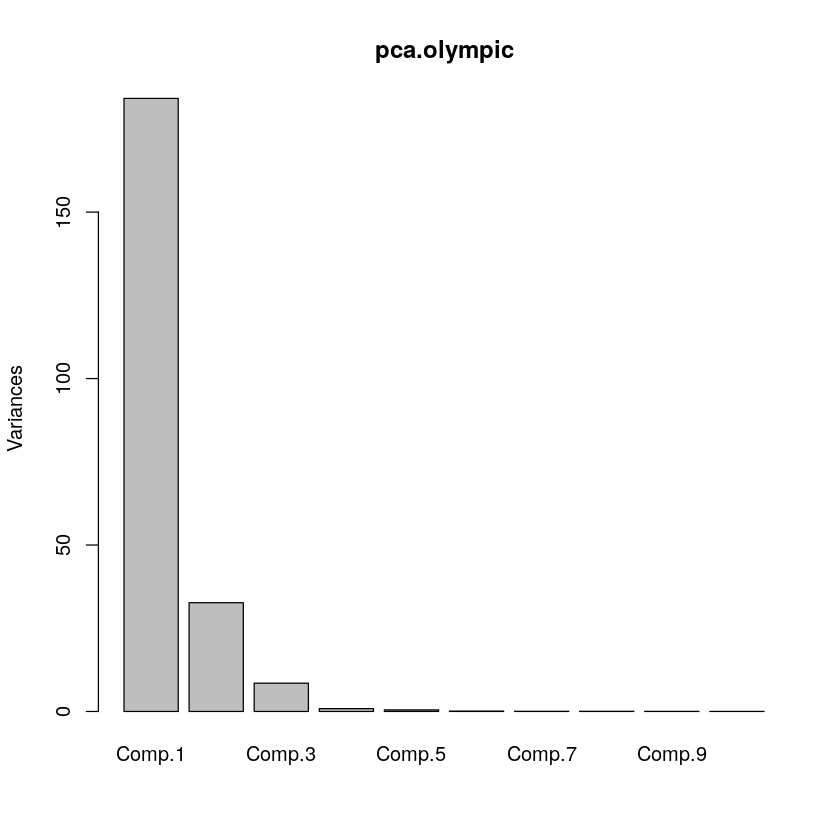

In [4]:
plot(pca.olympic) # screeplot (graphical display)

In [5]:
#cumPropVar= cumsum(pca.olympic$sdev^2)/sum(pca.olympic$sdev^2) 
summary(pca.olympic) # summary (numerical display)

Importance of components:
                           Comp.1    Comp.2    Comp.3      Comp.4      Comp.5
Standard deviation     13.5703138 5.7156823 2.9154554 0.926253946 0.687453789
Proportion of Variance  0.8115669 0.1439729 0.0374591 0.003780982 0.002082723
Cumulative Proportion   0.8115669 0.9555397 0.9929988 0.996779816 0.998862539
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.3412388755 0.2436593218 0.2279377697 0.1539025888
Proportion of Variance 0.0005131703 0.0002616439 0.0002289692 0.0001043846
Cumulative Proportion  0.9993757093 0.9996373532 0.9998663224 0.9999707070
                            Comp.10
Standard deviation     8.152850e-02
Proportion of Variance 2.929297e-05
Cumulative Proportion  1.000000e+00

The biplot gives a graphical summary of both samples (athletes) in terms of scores and the variables/features in terms of loadings

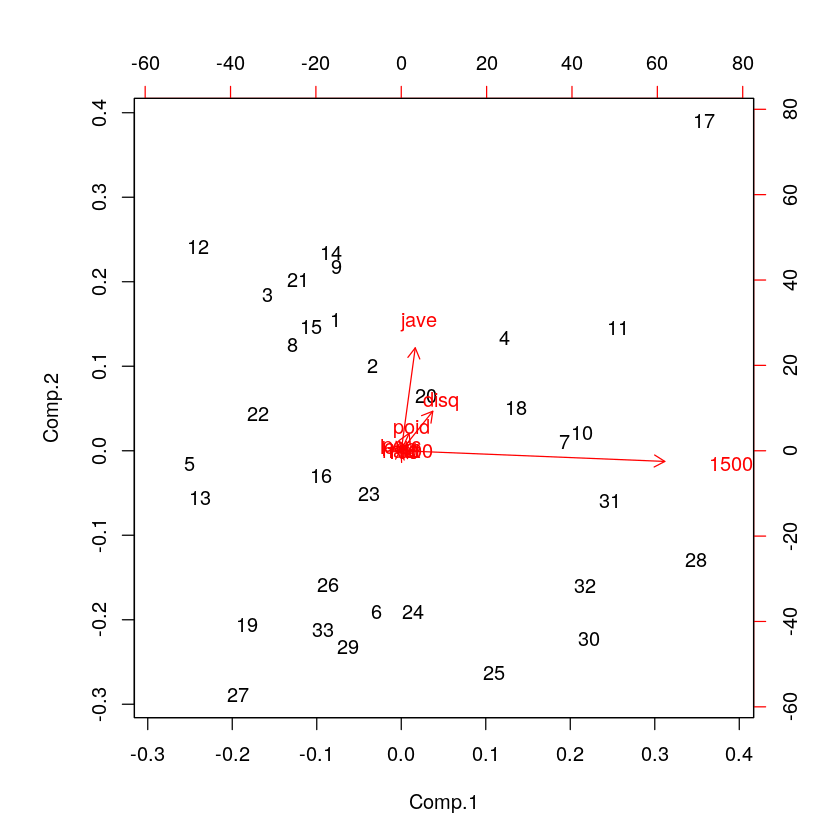

In [6]:
biplot(pca.olympic)

From this plot, we see that the first principal component is positively associated with longer times on the 1500. So, slower runners will have higher value on this component.

In [7]:
cat('average 1500 event score (seconds) == ', mean( olympic$tab[, "1500"] ) )
data.frame( olympic$tab[, "1500"], pca.olympic$scores[, 1])

average 1500 event score (seconds) ==  276.0385

olympic.tab....1500..,pca.olympic.scores...1.
268.95,-6.073747
273.02,-2.678254
263.20,-12.350157
285.11,9.526886
256.64,-19.567241
274.07,-2.312197
291.20,15.048108
265.86,-10.023305
269.62,-5.976738
292.24,16.717007


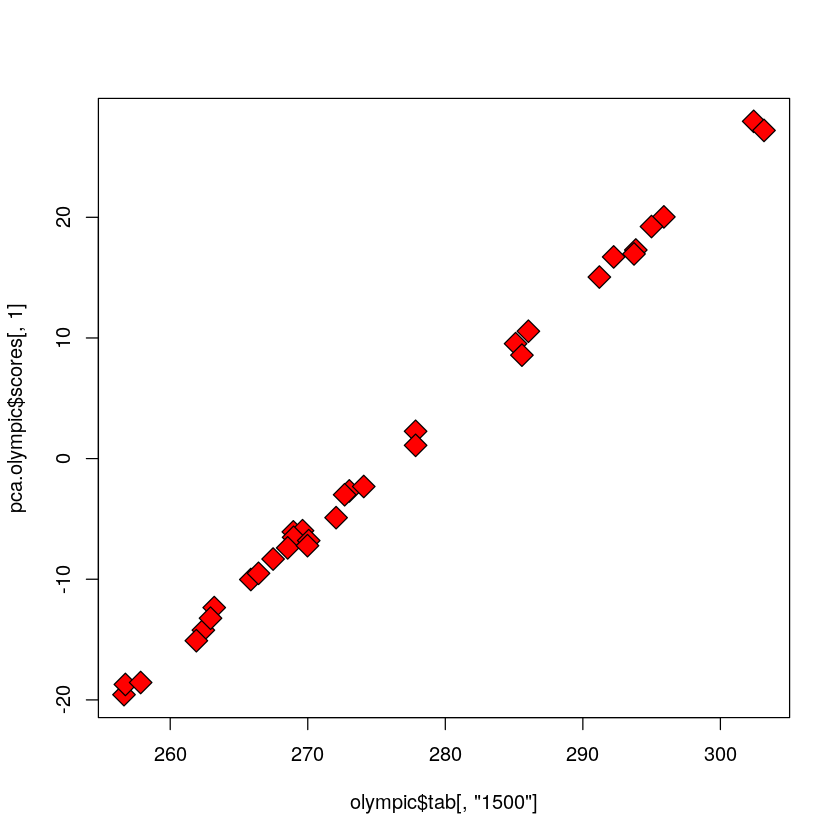

In [8]:
 plot(olympic$tab[, "1500"], pca.olympic$scores[, 1], pch = 23, bg = "red", cex = 2)

Also, the second principal component is associated with strength in the form of a long javelin throw.

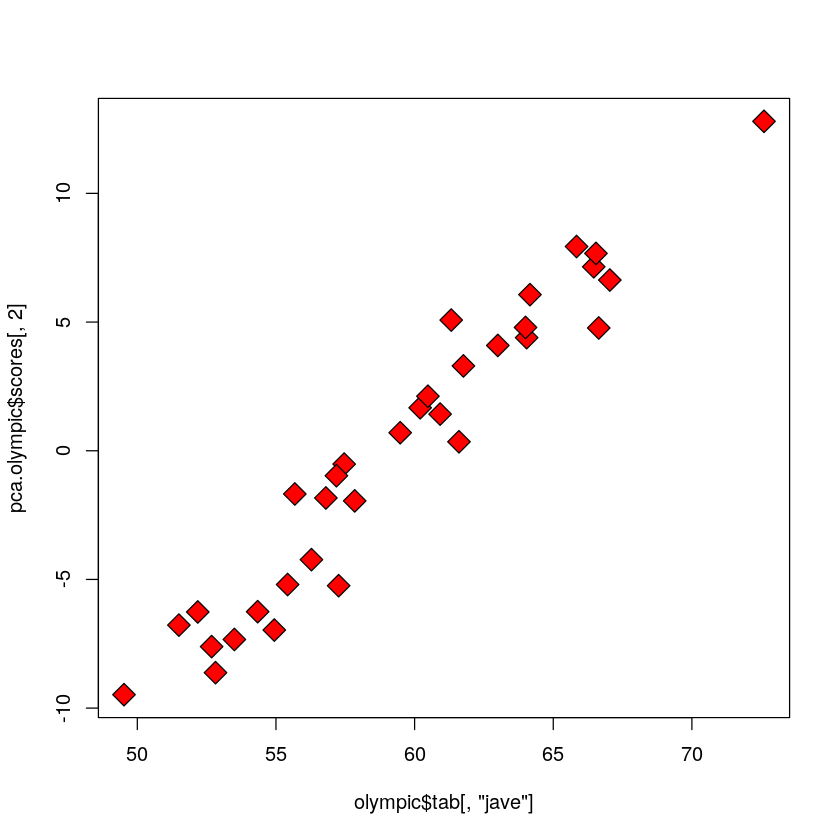

In [9]:
 plot(olympic$tab[, "jave"], pca.olympic$scores[, 2], pch = 23, 
      bg = "red", cex = 2)

Standardizing
---------------

In the previous example, we saw that the two variables were based somewhat on speed and strength. However, 
**we did not scale the variables** so the 1500 has much more weight than the 400, for instance. We correct this by passing the cor=TRUE argument, which defaults to FALSE, as an argument to princomp.

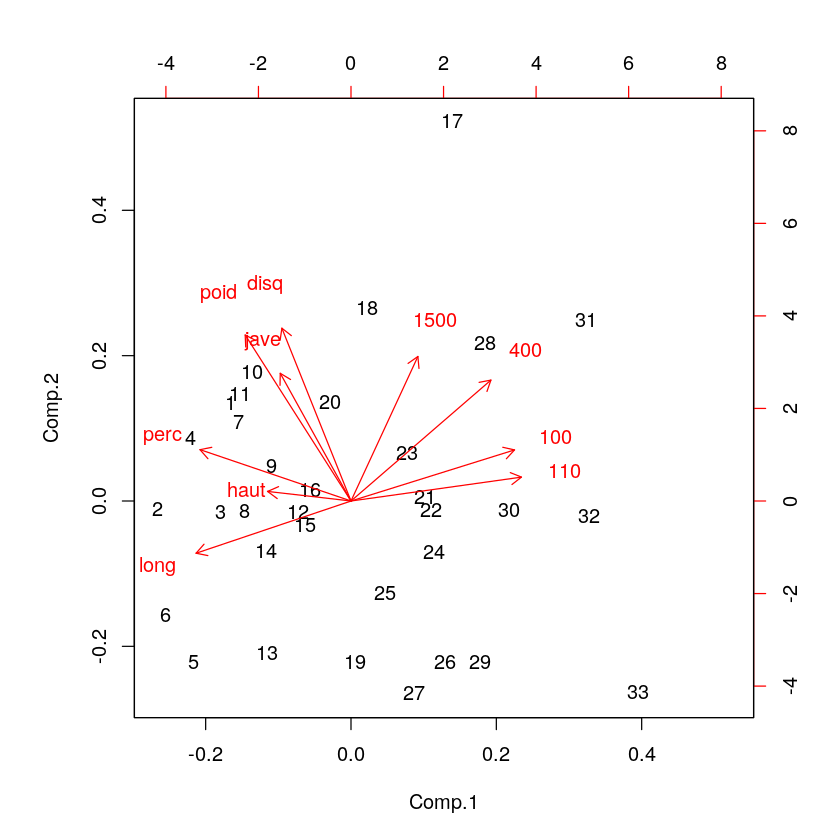

In [10]:
pca.olympic = princomp(olympic$tab, cor = TRUE)
biplot(pca.olympic)

This plot reinforces our earlier interpretation and has put the running events on an “even playing field” by standardizing.

In [11]:
pca.olympic$loadings[, 1]


100       long       poid       haut        400        110       disq 
 0.4158823 -0.3940515 -0.2691057 -0.2122818  0.3558474  0.4334816 -0.1757923 
      perc       jave       1500 
-0.3840821 -0.1799436  0.1701426

In [12]:
pca.olympic$loadings[, 2]

100       long       poid       haut        400        110       disq 
 0.1488081 -0.1520815  0.4835374  0.0278985  0.3521598  0.0695682  0.5033347 
      perc       jave       1500 
 0.1495820  0.3719570  0.4209653